----------------------------------
Factors influencing the price of used cars using Linear Regression
----------------------------------

### Background & Context

There is a huge demand for used cars in the indian market today. As the sale of new cars are declining, the sale of pre-owned cars have been increasing. A new tech startup company Cars4U aims to capture this market for used cars.

## Problem:

**The following questions need to be answered in order to effectively predict the price of used cars:**

- Does various predicting factors really affect the price of used cars?
- What are the predicting variables actually affecting the price of used cars?
- Does the Year of the car model really effect the price?
- Does the number of Kilometers_Driven really effect the price of used cars?
- What is the impact of engine power on the price?
- Is automatic transmission lined to higher price than manual transmission?
- What is the impact of Fuel_Type on the price?
- Does changing multiple ownership have any effect on the price of the car?
- Does Mileage have an impact on the car?


### Attribute Information:

 * S.No.: Serial Number
 * Name: Name of the car which includes Brand name and Model name
 * Location: The location in which the car is being sold or is available for purchase Cities
 * Year: Manufacturing year of the car
 * Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM.
 * Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
 * Transmission: The type of transmission used by the car. (Automatic / Manual)
 * Owner: Type of ownership
 * Mileage: The standard mileage offered by the car company in kmpl or km/kg
 * Engine: The displacement volume of the engine in CC.
 * Power: The maximum power of the engine in bhp.
 * Seats: The number of seats in the car.
 * New_Price: The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
 * Price: The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# Load the data into pandas dataframe
df = pd.read_csv(
    "used_cars_data.csv"
)  # Make changes to the path depending on where your data file is stored.

In [42]:
# Check the first 10 rows of dataframe
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [43]:
df.isnull().sum().sort_values()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
New_Price            6247
dtype: int64

In [4]:
# check number of rows and columns
df.shape

(7253, 14)

In [6]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# Check 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [7]:
# let's take a look at the column names
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

The `Serial number ('S.No')` is irrelevant in our analysis of predicting the car value. Therefore we will drop that column

In [8]:
# Drop the serial number
df.drop(['S.No.'],axis=1,inplace=True)

In [748]:
# check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [831]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

Since the column New_Price has a huge number of null values , we can do either of the below :
* Impute the values <br>
* Drop the column <br>

But since almost 85% of the column (New_Price) has missing values, imputing it does not make sense, since it biases the model based on imputed values. Therefore we will drop the New_Price column

In [9]:
df.drop(['New_Price'] , axis = 1 , inplace=True)

In [10]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


#### Dimension Reduction - Car Name :
<br>
We want to reduce the car name and put it into different buckets. This also helps us in reducing the number of dimensions for our model.
Lets first get the car brand from the car name. We will split the car name and extract the brand name from that
<br>
<br>

In [11]:
# Get extract the first word from the car name to get the brand name
df['Brand'] = df['Name'].str.split().str.get(0)

In [12]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)



As seen the car brand "Isuzu" and "ISUZU" are the same but are counted as different due to case sensitive issues.
We will change the case to match them both to allow us to group these data points together later.

**Capitalize the first letter of the car name to allow us to handle case sensitive issues with car names**

In [13]:
# Change the first letter of the car name to capital and change eveything else to lower case
df['Brand']=df['Brand'].str.title()

In [14]:
# Check for the unique column names to see if same brand names with different cases are taken care of
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'Bmw', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'Opelcorsa'], dtype=object)


#### Dimension reduction for car brand :

There are 32 unique car brand names and we can further group these into 6 different car class based on our understanding of where there cars fit, and the mean and median prices of the cars

In [15]:
# Group different car brand names into different buckets of class (based on mean, median of each brand), in order to
# further reduce the unique values for cars

print("Mean of car brands is : \n ")
print(df['Price'].groupby(df['Brand']).mean().sort_values())
print("\n \nMedian of car brands is : \n ")
print(df['Price'].groupby(df['Brand']).median().sort_values())

Mean of car brands is : 
 
Brand
Ambassador         1.350000
Smart              3.000000
Chevrolet          3.044463
Datsun             3.049231
Fiat               3.269286
Tata               3.562849
Maruti             4.517267
Nissan             4.738352
Volkswagen         5.307270
Hyundai            5.343433
Honda              5.411743
Renault            5.799034
Ford               6.889400
Skoda              7.559075
Mahindra           8.045919
Force              9.333333
Mitsubishi        11.058889
Toyota            11.580024
Isuzu             14.696667
Jeep              18.718667
Volvo             18.802857
Bmw               25.243146
Audi              25.537712
Mercedes-Benz     26.809874
Mini              26.896923
Jaguar            37.632250
Land              39.259500
Porsche           48.348333
Bentley           59.000000
Lamborghini      120.000000
Hindustan               NaN
Opelcorsa               NaN
Name: Price, dtype: float64

 
Median of car brands is : 
 
Brand
Ambas

In [16]:
# Grouping the 32 unique car brand names into 6 different class in order to reduce the columns in one hot encoding

# Assign the Class Class to each car brand by creating a dataframe from a dictionary.
# Class 6 is the high end car, and 1 is the low end car. 

Car_Class_Dict = pd.DataFrame({
                   "Class" : ['6','5','5','5','5',
                              '4','4','4','4','4',
                              '3','3','3','3','3','3',
                              '2','2','2','2','2','2','2','2',
                              '1','1','1','1','1'],
                   
                   "Brand" : ['Lamborghini','Bentley', 'Porsche', 'Land', 'Jaguar',
                              'Mini' , 'Mercedes-Benz', 'Bmw' ,'Audi', 'Volvo',
                              'Jeep' ,'Mitsubishi','Toyota' , 'Isuzu', 'Force' , 'Mahindra',
                              'Skoda' , 'Renault' , 'Ford' ,'Honda' , 'Volkswagen','Hyundai' , 'Nissan' ,'Maruti' ,
                              'Datsun' , 'Tata' , 'Fiat' , 'Chevrolet' , 'Ambassador'] 
                  })


# Assign the class name to each brands in original df (df) by merging these 2 dataframes
df = pd.merge(df ,Car_Class_Dict )

In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7250 non-null   object 
 1   Location           7250 non-null   object 
 2   Year               7250 non-null   int64  
 3   Kilometers_Driven  7250 non-null   int64  
 4   Fuel_Type          7250 non-null   object 
 5   Transmission       7250 non-null   object 
 6   Owner_Type         7250 non-null   object 
 7   Mileage            7248 non-null   object 
 8   Engine             7204 non-null   object 
 9   Power              7204 non-null   object 
 10  Seats              7197 non-null   float64
 11  Price              6018 non-null   float64
 12  Brand              7250 non-null   object 
 13  Class              7250 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 849.6+ KB


The datatype of the following columns with **object** type are to be converted to **categorical** type . <br>
* Location <br>
* Fuel_Type <br>
* Transmission <br>
* Owner_Type <br>
* Brand <br>
* Class <br>

In [17]:
# Count the number of unique values in each of these columns to decide weather to convert them to dummy columns  
# by doing one hot encoding . If there are a lot of unique values then we want to rethink before doing 
# one hot encoding on those columns

print("Unique count of location : " , df['Location'].nunique())
print("Unique count of  : Fuel_Type " , df['Fuel_Type'].nunique())
print("Unique count of Transmission : " , df['Transmission'].nunique())
print("Unique count of Owner_Type : " , df['Owner_Type'].nunique())
print("Unique count of Brand : " , df['Brand'].nunique())
print("Unique count of Class : " , df['Class'].nunique())

Unique count of location :  11
Unique count of  : Fuel_Type  5
Unique count of Transmission :  2
Unique count of Owner_Type :  4
Unique count of Brand :  29
Unique count of Class :  6


As seen from the above model, most of these columns do not have a large number of levels hence making an argument to dummy encode these columns. The brand name seems to have a slightly higher number of columns. We will drop prior 

In [18]:
# Convert object datatypes for string columns to  categorical type
cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type' , 'Class' ]

for col in cat_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7250 non-null   object  
 1   Location           7250 non-null   category
 2   Year               7250 non-null   int64   
 3   Kilometers_Driven  7250 non-null   int64   
 4   Fuel_Type          7250 non-null   category
 5   Transmission       7250 non-null   category
 6   Owner_Type         7250 non-null   category
 7   Mileage            7248 non-null   object  
 8   Engine             7204 non-null   object  
 9   Power              7204 non-null   object  
 10  Seats              7197 non-null   float64 
 11  Price              6018 non-null   float64 
 12  Brand              7250 non-null   object  
 13  Class              7250 non-null   category
dtypes: category(5), float64(2), int64(2), object(5)
memory usage: 602.9+ KB


<!-- # The datatype of Car brand name column (Name_New column) is an object. We need to convert them to string -->

##### Analyze data for Fuel_Type & Mileage:
A quick glace at the dataset shows that the **Mileage** column has 2 different units - kmpl and km/kg. We need to convert these to single unit. The Mileage unit might be dependent on the **Fuel_Type**. We will first look at that.


In [19]:
# Find the unique Fuel_Types
df['Fuel_Type'].unique()

['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']
Categories (5, object): ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']

Notice that one of the fuel type is **electric**, which does not use the unit of measurement used for traditional fuel type (kmpl or km/kg). 

Lets check how many sample data points are **electric** vehicles 

In [20]:
# Get all the data for electric cars
df[df['Fuel_Type']== 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Class
4270,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,3
6209,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,3


Out of 7253 data points , only 2 cars are electric with missing values in Mileage column for both these data points. Therefore we can delete these 2 rows, without having any significant impact on the model

In [21]:
# Delete the rows where the car is electric
df.drop(df[df['Fuel_Type'] == 'Electric'].index, inplace=True)

<br>

#### We need to check if there are any other units of measurement for Mileage other than km/kg and kmpl

Split the Mileage column into 2 columns - one that contains just the numericals and the other one with unit of measurement . This not only helps us check unique units of measurement for fuel type but the numeric column is needed at a later stage when we build the model.

In [22]:
# Split the Mileage columns into 2 columns
# Mileage_kmpl_kmpg - This includes the mileage in numericals
# Mileage_Unit - This includes the unit of the Mileage for that corresponding row

df = df.join(df['Mileage'].str.split(" ", expand=True).rename(columns={0:'Mileage_kmpl_kmpg' , 1:'Mileage_Unit'}))

In [23]:
# Get the count of datapoints recorded in km/kg and kmpl

kmkg_count = df.groupby(['Mileage_Unit'])['Mileage_Unit'].count()[0]
kmpl_count = df.groupby(['Mileage_Unit'])['Mileage_Unit'].count()[1]

print(f'Count of data recorded in : km/kg = {kmkg_count} and kmpl = {kmpl_count}')

Count of data recorded in : km/kg = 74 and kmpl = 7174


The Mileage is recorded in 2 different units here <br>
* km/kg
* kmpl

We can do either of the 2 options:<br>

* **Option 1** : Convert the km/kg to kmpl or viceversa <br>
* **Option 2** : Delete all the values recorded for km/kg since it amounts to roughly 1% (74 out of 7174) of the total dataset, thereby does not materially impacting our result/analysis.

#### Lets do a breakdown of the mileage unit count grouped by fuel_type to see if there is any insight there

In [24]:
# Get the count of cars broken down by 'Units of Mileage' and 'Fuel Type'
df.groupby(['Mileage_Unit' , 'Fuel_Type'])['Mileage_Unit'].count()[lambda x: x>0]

Mileage_Unit  Fuel_Type
km/kg         CNG            62
              LPG            12
kmpl          Diesel       3850
              Petrol       3324
Name: Mileage_Unit, dtype: int64

All the cars where the unit of measurement is listed in **km/kg have the CNG and LPG as fuel type**, the total of which amounts to roughly 1% of entire dataset. There are 3 arguments to support **Option 2** (mentioned above)
* Firstly, converting to kmpl makes more intuitive sense in measuring mileage in kmpl rather than km/kg.We almost always never rate a car and its performance based on km/kg mileage. We always measure it based on kmpl.

* Secondly, in order to accurately convert km/kg to kmpl (esp for CNG), we are required to know the temperature and pressure of the substance to accurately convert from mass to volumne. We do not have that information and hence we cannot accurately convert km/kg to kmpl.

* Thirdly, there are only 74 cars that have data recorded as km/kg , an amount roughly 1% of the entire sample data points.

Therefore, we make an argument to delete the data points which have km/kg as Mileage units.

If we had chosen **Option 1** , to convert all values to km/kg, then we would have to follow these below conversion metrics to convert the Mileage to kmpl
#### Conversion ratio for each fuel type
gasoline : 1 kg = 1.35 litre  , 1 litre = 0.740 Kg <br>
Diesel : 1 kg = 1.192 litre   , 1 litre = 0.84 Kg   <br>
LPG : 1 kg = 1.844 litre      , 1 litre = 0.54 Kg   <br>

#### However, given the reasoning mentioned above, we will go ahead with **Option 2** and delete the data points that have Mileage recorded as km/kg.

In [25]:
# Option 2 : Delete the rows that have km/kg as the unit of measurement.

df.drop(df[df['Mileage_Unit'] == 'km/kg'].index , inplace=True)

Rename the **Mileage** column to include the unit of measurement, since we now have only one unit of measurement (kmpl).

In [26]:
# Rename the Mileage_kmpl_kmpg column to "Mileage(kmpl)". 
df.rename(columns = {'Mileage_kmpl_kmpg' : "Mileage(kmpl)"} , inplace = True)

In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7174 entries, 1 to 7249
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7174 non-null   object  
 1   Location           7174 non-null   category
 2   Year               7174 non-null   int64   
 3   Kilometers_Driven  7174 non-null   int64   
 4   Fuel_Type          7174 non-null   category
 5   Transmission       7174 non-null   category
 6   Owner_Type         7174 non-null   category
 7   Mileage            7174 non-null   object  
 8   Engine             7128 non-null   object  
 9   Power              7128 non-null   object  
 10  Seats              7121 non-null   float64 
 11  Price              5950 non-null   float64 
 12  Brand              7174 non-null   object  
 13  Class              7174 non-null   category
 14  Mileage(kmpl)      7174 non-null   object  
 15  Mileage_Unit       7174 non-null   object  
dtypes: cat

##### Analyze the units of measurement for Engine and Power 
Check if all datapoints for Engine & for Power have the same unit of measurement . If not then you might have to analyze and convert further

In [27]:
# Split the string and integer values of columns "Engine" and "Power" , into 2 different columns 
df = df.join(df['Engine'].str.split(" " ,expand=True).rename(columns = {0:"Engine(cc)" , 1:"Engine_Unit"}))
df = df.join(df['Power'].str.split(" " ,expand=True).rename(columns = {0:"Power(bhp)" , 1:"Power_Unit"}))


Check the unique count of units of measurement of "Engine" column and for "Power" column to see if they have multiple units of measurement as was the case for Mileage column.


In [28]:
print(" Number of unique counts of Engine Units" , df['Engine_Unit'].nunique())
print(" Number of unique counts of Power Units" , df['Power_Unit'].nunique())

 Number of unique counts of Engine Units 1
 Number of unique counts of Power Units 1


Since there is only 1 unit of measurement in these datapoints for Engine and Power column, we do not have to do any conversion. We can drop these units column (`Engine_Unit` and `Power_Unit`). We will drop all unnecessary columns at later point

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7174 entries, 1 to 7249
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7174 non-null   object  
 1   Location           7174 non-null   category
 2   Year               7174 non-null   int64   
 3   Kilometers_Driven  7174 non-null   int64   
 4   Fuel_Type          7174 non-null   category
 5   Transmission       7174 non-null   category
 6   Owner_Type         7174 non-null   category
 7   Mileage            7174 non-null   object  
 8   Engine             7128 non-null   object  
 9   Power              7128 non-null   object  
 10  Seats              7121 non-null   float64 
 11  Price              5950 non-null   float64 
 12  Brand              7174 non-null   object  
 13  Class              7174 non-null   category
 14  Mileage(kmpl)      7174 non-null   object  
 15  Mileage_Unit       7174 non-null   object  
 16  Engine

In [29]:
# Convert the numerical columns (Engine(cc), Mileage(kmpl), and Power(bhp)), which are object type, to floats
# Note that `Mileage` , `Engine` , `Power` columns are original columns and the numerical values 
# of these is stored in the below columns.
# Therefore we will not convert `Mileage` , `Engine` , `Power` and 
# will convert the new columns ('Engine(cc)' , 'Power(bhp)' , 'Mileage(kmpl)') and delete the old 
# ones at later point

cols_to_float = ['Engine(cc)' , 'Power(bhp)' , 'Mileage(kmpl)']
df[cols_to_float] = df[cols_to_float].apply(pd.to_numeric , errors='coerce')

#### Handle Missing Values

In [847]:
# Check for any missing values
df.isnull().sum().sort_values()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Mileage_Unit            0
Mileage(kmpl)           0
Brand                   0
Class                   0
Engine_Unit            46
Engine(cc)             46
Power                  46
Engine                 46
Power_Unit             46
Seats                  53
Power(bhp)            172
Price                1224
dtype: int64

We can either handle these missing values or not chose to include those in our model. Intuitively speaking, these missing independent variables (`Power , Engine, and Seats`) are relevant to our model because the price of the car could be dependent on all these 3 factors. Therefore, we will go ahead and handle them rather than excluding these variables from our model.

Since there are less than  1% of the dataset that has missing values (for `Power(bhp), Seats, and Engine(cc)`), we can impute them to equal the **median** of these corresponding column . `Price` column is the dependent varaible and therefore we do not impute that.

In [774]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7174.0,2013.368414,3.251425,1998.00,2011.000,2014.000,2016.00,2019.0
Kilometers_Driven,7174.0,58740.538054,84857.628073,171.00,34000.000,53366.000,73000.00,6500000.0
Seats,7121.0,5.283387,0.812484,0.00,5.000,5.000,5.00,10.0
Price,5950.0,9.547287,11.232507,0.44,3.500,5.695,10.00,160.0
Mileage(kmpl),7174.0,18.081171,4.488345,0.00,15.155,18.150,21.03,28.4
Engine(cc),7128.0,1622.417368,595.306301,624.00,1198.000,1493.000,1984.00,5998.0
Power(bhp),7002.0,113.292936,53.516544,34.20,77.000,98.600,138.10,616.0


In [33]:
# we will replace missing values in every column, except the dependent variable columns (Price), with its median

cols_null = ['Engine(cc)' , 'Seats' , 'Power(bhp)']
medianFiller = lambda x: x.fillna(x.median())
df[cols_null] = df[cols_null].apply(medianFiller, axis=0)


We also notice from the above summary stats that the min value for Seats and Mileage(kmpl) is 0, which does not make sense

In [34]:
# Check the data that has 0 Seats 

print("\nData set where Seat count is 0 :")
df[df['Seats']==0]


Data set where Seat count is 0 :


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Class,Mileage(kmpl),Mileage_Unit,Engine(cc),Engine_Unit,Power(bhp),Power_Unit
3683,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,18.0,Audi,4,10.5,kmpl,3197.0,CC,98.6,bhp


In [35]:
# Check the data for cars that have 0 Mileage (get 5 data points)

print("\n5 data points for data set where Mileage is 0 :")
df[df['Mileage(kmpl)'] == 0 ].sort_values(by='Year', ascending=False).head(5)


5 data points for data set where Mileage is 0 :


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Class,Mileage(kmpl),Mileage_Unit,Engine(cc),Engine_Unit,Power(bhp),Power_Unit
5351,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0 kmpl,1950 CC,181.43 bhp,5.0,38.99,Mercedes-Benz,4,0.0,kmpl,1950.0,CC,181.43,bhp
5315,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67,Mercedes-Benz,4,0.0,kmpl,1950.0,CC,194.00,bhp
3496,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0 kmpl,1199 CC,88.7 bhp,5.0,NaN,Honda,2,0.0,kmpl,1199.0,CC,88.70,bhp
5617,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.00,Mercedes-Benz,4,0.0,kmpl,1950.0,CC,194.00,bhp
5375,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,39.50,Mercedes-Benz,4,0.0,kmpl,1950.0,CC,194.00,bhp


#### Insights:

* It is unlikely that a Audi which is owned first hand with 2012 built model has 0 seats. This seems like a typo in data recording
* It is unlikely that a 2019 built cars with luxury brand names such as Merc with low kilometers driven has 0 mileage

The above data points, with the number of **Seats** and the **Mileage** of the car (kmpl) as 0 , do not make sense, unless there is additional information to support these findings. Perhaps the cars got totalled due to a major accident and is rendered unusable hence making Mileage(kmpl) as 0. If this is the case then these cars are unusuable and will bias the result/model since it is not a true representative of used car data for the purpose of our analysis. In any case, without this additional information to feed into this model, these numbers seem to be either a typo or not a true representative of the used car data and therefore needs to be taken out of the model.

In [36]:
# Check the total count of cars which has 0 seats or 0 mileage 
df['Class'][(df['Seats'] == 0) | (df['Mileage(kmpl)'] ==0)].count()


81

In addition to above mentioned reasoning, since there are only 81 data points which have 0 seats or 0 mileage, we can further support the idea of deleting these to remove any incorrect data from the dataset

In [37]:
# Delete the cars with 0 seats or 0 mileage(kmpl)

df.drop(df[df['Mileage(kmpl)'] == 0].index , inplace=True)
df.drop(df[df['Seats'] == 0].index , inplace=True)

In [784]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7093.0,2013.413506,3.203614,1998.00,2011.0,2014.0,2016.00,2019.0
Kilometers_Driven,7093.0,58603.146341,85209.216580,171.00,33901.0,53105.0,73000.00,6500000.0
Seats,7093.0,5.283801,0.808837,2.00,5.0,5.0,5.00,10.0
Price,5882.0,9.523553,11.182636,0.44,3.5,5.7,10.00,160.0
Mileage(kmpl),7093.0,18.286172,4.078889,6.40,15.3,18.2,21.10,28.4
Engine(cc),7093.0,1620.590159,591.247332,624.00,1198.0,1493.0,1968.00,5998.0
Power(bhp),7093.0,112.929170,53.022612,34.20,78.9,98.6,138.03,616.0


As seen from the above summary, the minimum number of seats is now 2 and the minimum Mileage(kmpl) is now 6.4, which makes sense.

##### Columns to drop :
* **Power_Unit** - Not needed
* **Engine_Unit** - Not needed
* **Engine** - Value extracted and split
* **Power** - Value extracted and split
* **Mileage** - Value extracted and split
* **Name** - Value extracted into "Class" column

In [851]:
# Columns to drop 
cols_to_drop = ['Engine_Unit', 'Power_Unit', 'Engine' ,'Power' ,'Mileage' ,'Name' , 'Mileage_Unit']
df.drop(cols_to_drop , axis=1, inplace=True)

In [40]:

# $###$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


df.isnull().sum().sort_values()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Power(bhp)              0
Seats                   0
Engine(cc)              0
Brand                   0
Class                   0
Mileage(kmpl)           0
Mileage_Unit            0
Engine_Unit            34
Power                  34
Engine                 34
Power_Unit             34
Price                1211
dtype: int64

### Insights :

* There are 32 unique car brands for this data set.
* There are 11 unique locations of car sale.
* **Year** of the car model ranges from 1999 to 2019.
* The **Price** of the used cars ranges from 44,000 INR to 1,60,00,000 INR, which is fairly wide spread.
* **Kilometers_Driven** has a much wider spread, with min of 171 and max of 6,500,000 , possibly implying this data is heavily skewed. This field might require some transformation, which we will explore later.

#### Missing Values in Dependant Variable (Price)
Drop the missing values of the price column (dependant variable), since we should not impute them which could lead to bias in the model

In [852]:
# Get the missing values in each column

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                1211
Brand                   0
Class                   0
Mileage(kmpl)           0
Engine(cc)              0
Power(bhp)              0
dtype: int64

In [853]:
# Drop all rows for Price that has missing values (as you can see from above, only Price column has missing values)
df.dropna( inplace=True)

In [854]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
Class                0
Mileage(kmpl)        0
Engine(cc)           0
Power(bhp)           0
dtype: int64

**All the missing values have been handled** <br>

#### Resetting the Categorical Variable `Fuel_Type`  :

As seen above, we notice that eventhough we deleted the data for Fuel_Type = ['CNG' , 'Electric' , 'LPG'] , since these are categorical variables, we need to reset them. Failing to do so will lead to extra columns that includes these 3 dummy variables and hence messes our model.

In [789]:
df['Fuel_Type'].groupby(df['Fuel_Type']).count().sort_values()

Fuel_Type
CNG            0
Electric       0
LPG            0
Petrol      2704
Diesel      3178
Name: Fuel_Type, dtype: int64

In [855]:
# Reseting the Fuel_Type to include only Diesel and Petrol and remove other values
df.Fuel_Type = df.Fuel_Type.cat.remove_categories(['CNG', 'Electric' ,'LPG'])

In [791]:
df['Fuel_Type'].groupby(df['Fuel_Type']).count()

Fuel_Type
Diesel    3178
Petrol    2704
Name: Fuel_Type, dtype: int64

# <a id='link2'>Exploratory Data Analysis and Data Preprocessing</a>

### Univariate Analysis

**Analysis of Price of the used car**

Mean:  9.5235532131928 
Median:  5.7


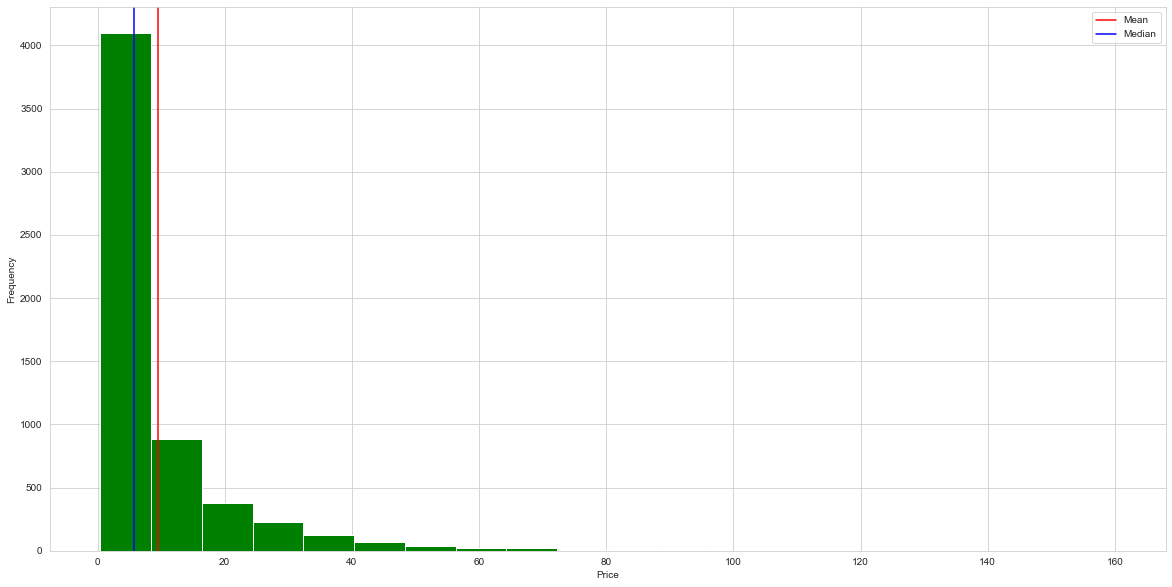

In [857]:
# Plot of histogram of the price of the used car

mean=df['Price'].mean()
median=df['Price'].median()

print('Mean: ',mean,'\nMedian: ',median)

plt.figure(figsize=(20,10)) # set the figure size
plt.hist(df['Price'],bins=20,color='green') #Plot the histogram
plt.axvline(mean,color='red',label='Mean')     # Draw lines on the plot for mean and median we have in Price
plt.axvline(median,color='blue',label='Median')

plt.xlabel('Price')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

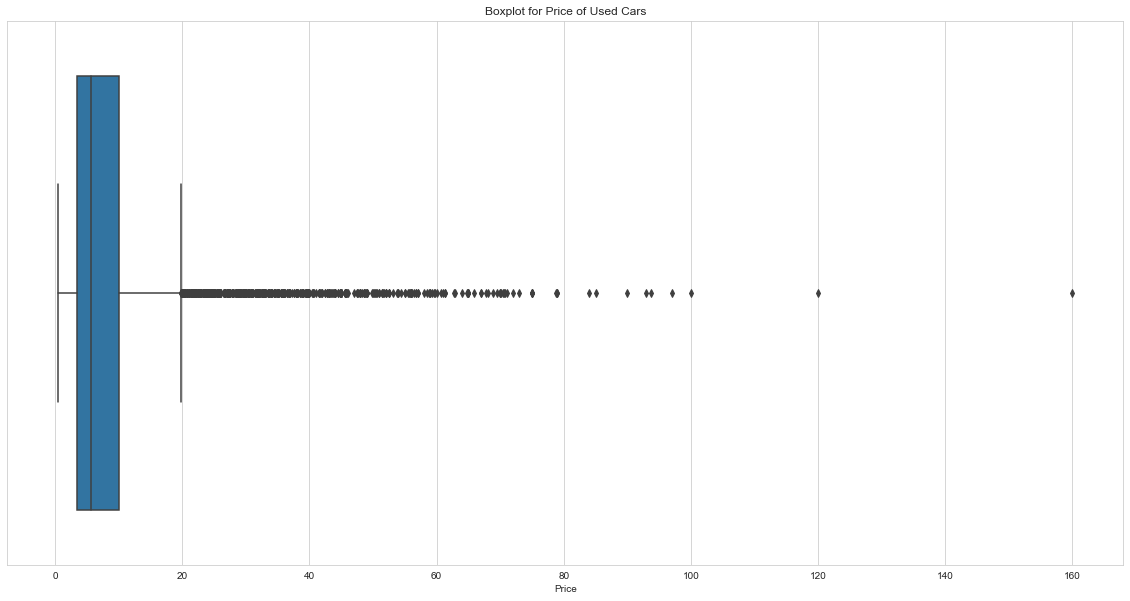

In [793]:
# Create boxplot for column="Price"

plt.figure(figsize=(20,10)) 
sns.boxplot(df['Price'] )
plt.title('Boxplot for Price of Used Cars')
plt.show()

**Observations**

- *Price* is heavily skewed to the right, which means some cars have prices more than 20 Lakh INR.
- Mean price of used cars is around 9.5 Lakh INR.
- Price column has a lot of outliers

**Analysis of Kilometers Driven by these used cars**

Mean:  58594.85515130908 
Median:  52975.5 
Max:  6500000 
Min:  171


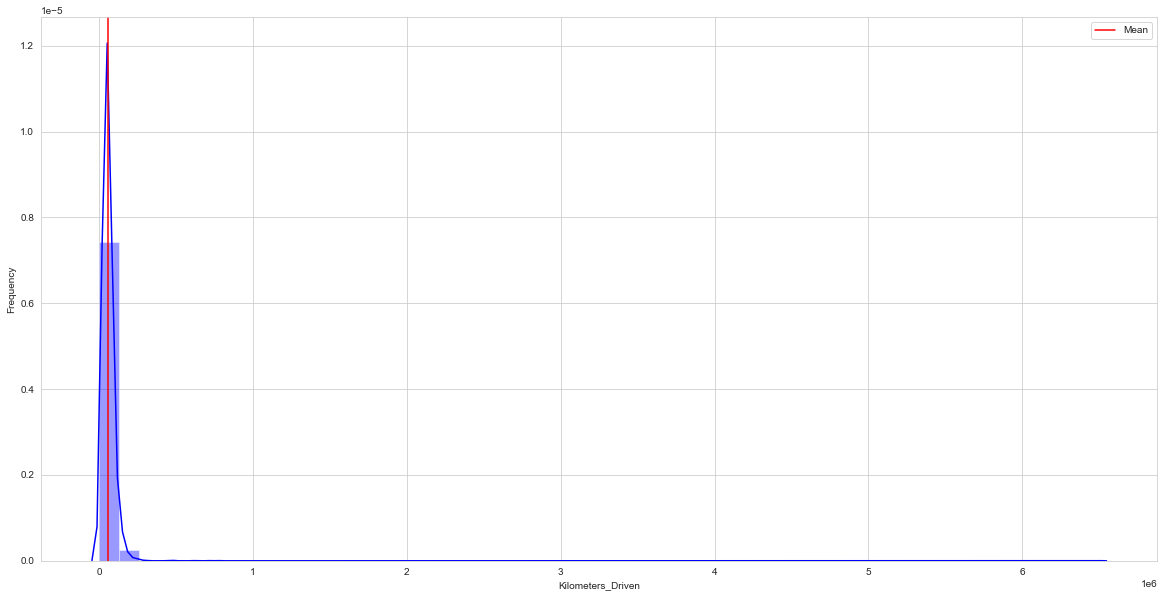

In [794]:
# Plot of histogram of the Kilometers Driven of the used car
mean=df['Kilometers_Driven'].mean()
median=df['Kilometers_Driven'].median()
max_val = df['Kilometers_Driven'].max()
min_val = df['Kilometers_Driven'].min()

print('Mean: ',mean,'\nMedian: ',median , '\nMax: ',max_val , '\nMin: ' , min_val)

plt.figure(figsize=(20,10)) # set the figure size
sns.distplot(df['Kilometers_Driven'] , color='blue')

plt.axvline(mean,color='red',label='Mean')     # Draw lines on the plot for mean and median we have in Price

plt.xlabel('Kilometers_Driven')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()


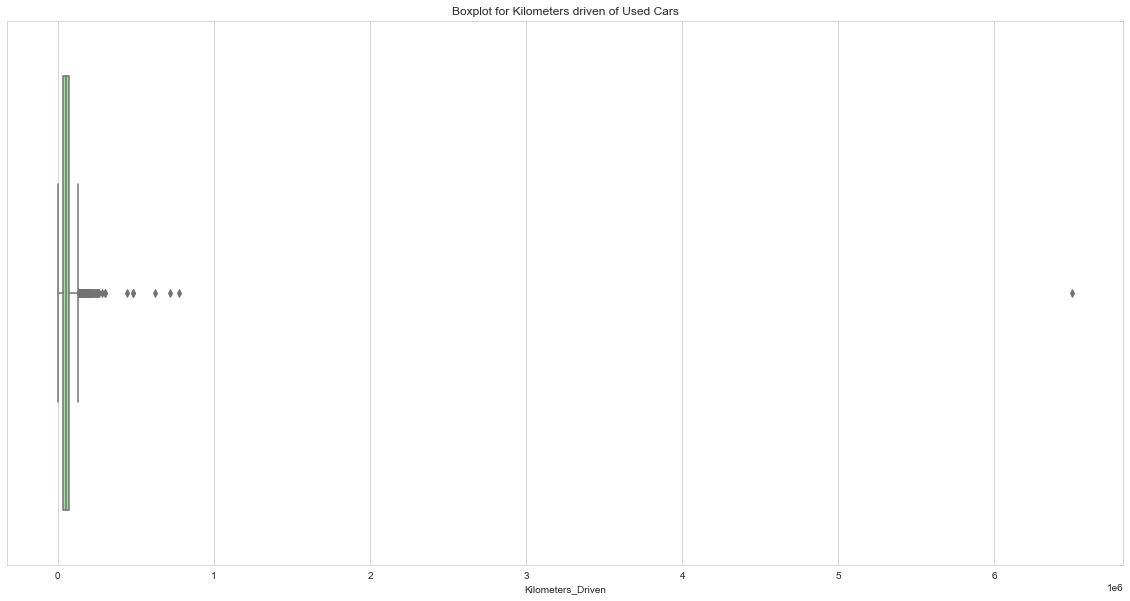

In [795]:
# Create boxplot for column="Kilometers_Driven"

plt.figure(figsize=(20,10)) 
sns.boxplot(df['Kilometers_Driven'] , color ='lightgreen')
plt.title('Boxplot for Kilometers driven of Used Cars')
plt.show()

**Observations**

- *Kilometers Driven* variable is heavily skewed to the right, with mean of 58k kilometers and min of 171 kilometers and max of 6,500,000 kilometers 
- Kilometers Driven column data has a huge spread
- Kilometers driven column has a lot of outliers

### Variable Transformations

***As seen from graphs above, Price and Kilometers_Driven are heavily skewed and therefore we will do log transformations***

Transforming `Price` and `Kilometers_Driven` :

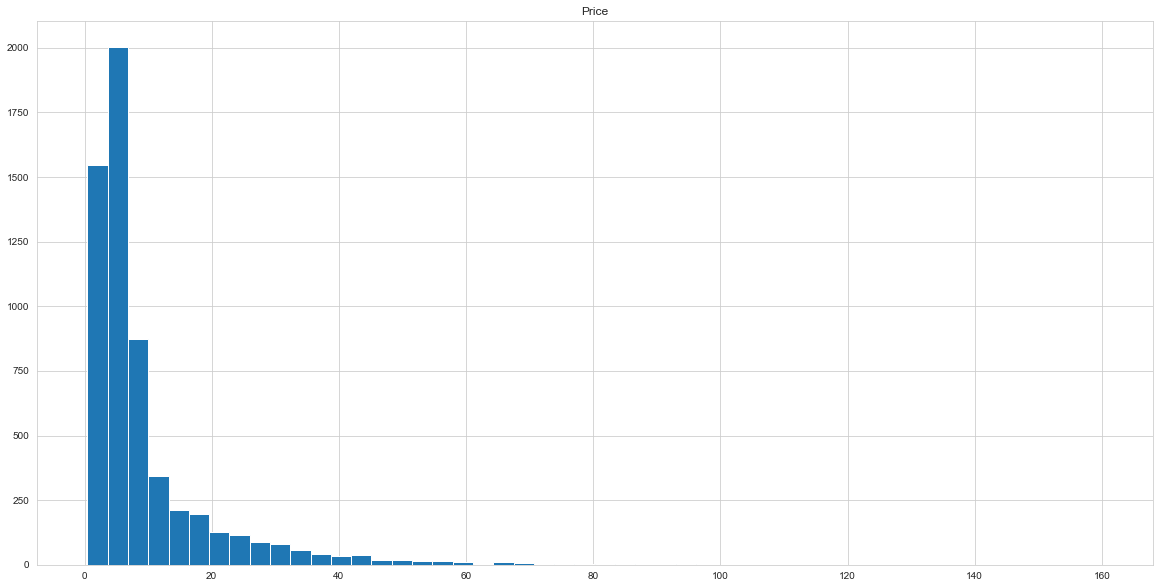

There are 0 number of negative values in Price column


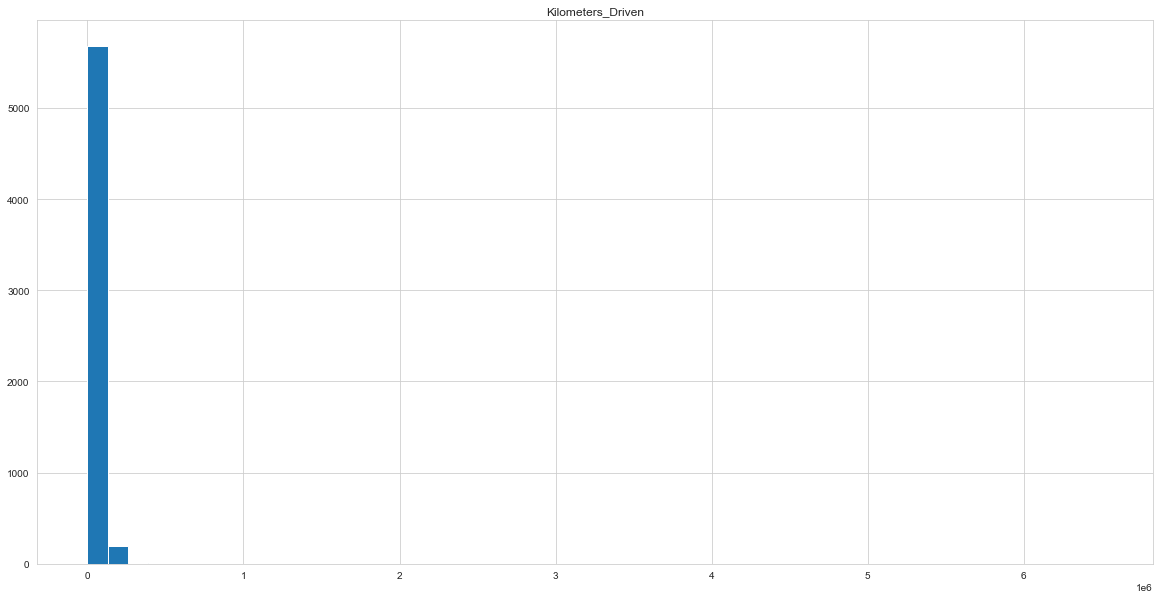

There are 0 number of negative values in Kilometers_Driven column


In [858]:
# Check to see if there are any negative numbers in the dataset, since log transofrmations 
# require all data set to be non-negative

cols_to_log = ['Price', 'Kilometers_Driven']
for colname in cols_to_log:
    plt.figure(figsize=(20,10)) 
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print("There are" , np.sum(df[colname] <= 0) , "number of negative values in" , colname, "column")

Since both `Price` and `Kilometers_Driven` column do not have any negative values, we can do log transformation on these columns

#### Log Transformation (Price & Kilometers_Driven) :

In [860]:
# Log transformation of "Price" and "Kilometers_Driven"

for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

In [798]:
df.head(5)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Class,Mileage(kmpl),Engine(cc),Power(bhp),Price_log,Kilometers_Driven_log
1,Chennai,2012,Diesel,Manual,First,7.0,Maruti,2,20.77,1248.0,88.76,1.945910,11.373675
2,Kochi,2018,Petrol,Manual,First,5.0,Maruti,2,21.56,1462.0,103.25,2.393339,10.153974
3,Jaipur,2015,Diesel,Manual,First,5.0,Maruti,2,25.20,1248.0,74.00,1.887070,11.073257
4,Jaipur,2017,Diesel,Manual,First,5.0,Maruti,2,28.40,1248.0,74.00,1.944481,10.126671
5,Bangalore,2015,Diesel,Manual,Second,5.0,Maruti,2,23.65,1248.0,88.50,2.224624,10.922209


### Distribution of each numerical variable

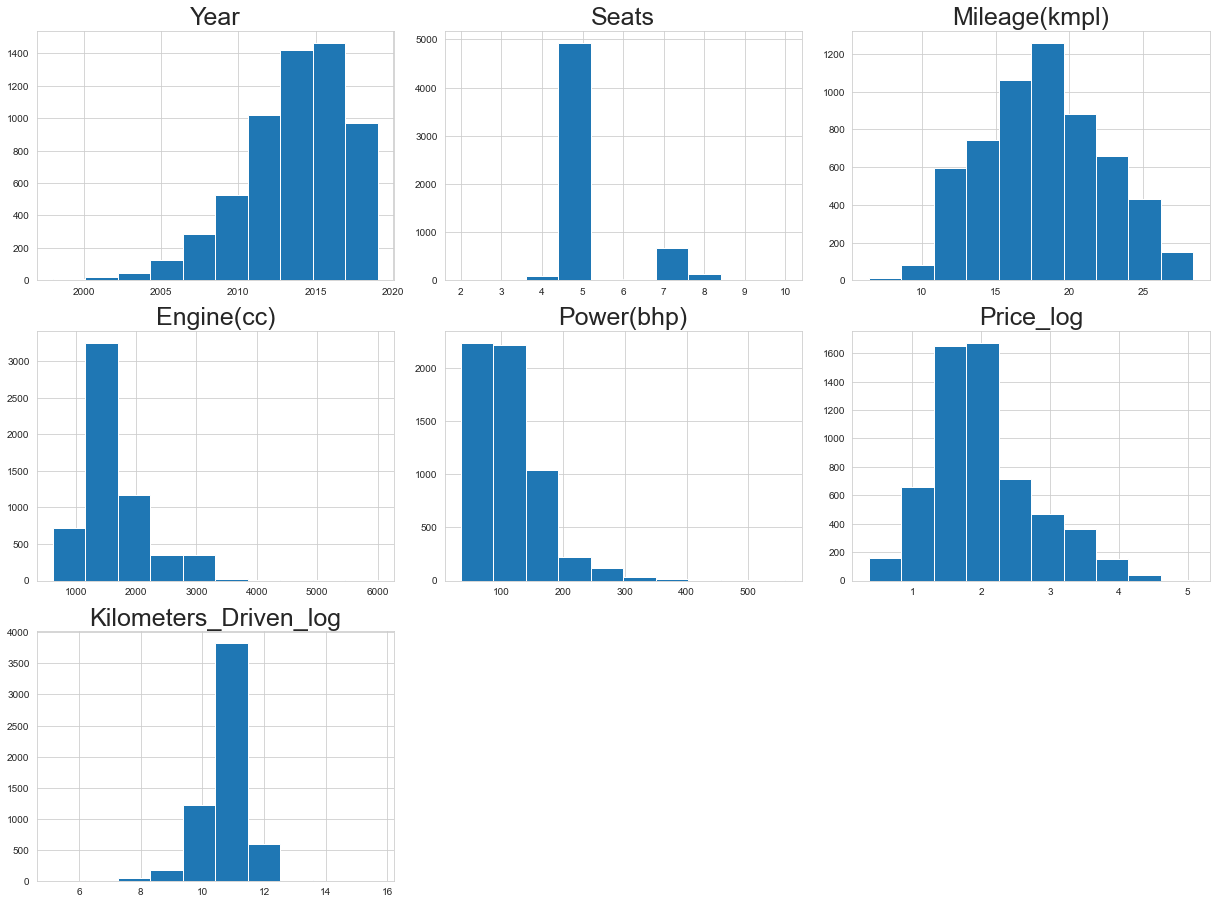

In [861]:
# lets plot histogram of all numerical variables

all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

In [699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 1 to 7249
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               5882 non-null   category
 1   Year                   5882 non-null   int64   
 2   Fuel_Type              5882 non-null   category
 3   Transmission           5882 non-null   category
 4   Owner_Type             5882 non-null   category
 5   Seats                  5882 non-null   float64 
 6   Brand                  5882 non-null   object  
 7   Class                  5882 non-null   category
 8   Mileage(kmpl)          5882 non-null   float64 
 9   Engine(cc)             5882 non-null   float64 
 10  Power(bhp)             5882 non-null   float64 
 11  Price_log              5882 non-null   float64 
 12  Kilometers_Driven_log  5882 non-null   float64 
dtypes: category(5), float64(6), int64(1), object(1)
memory usage: 603.3+ KB


**Observation**

* `Mileage` and `Engine` is somewhat normal distributed.
* The log transformation og `Kilometers Driven` and `Price` is now normally distributed instead of right skew, as was the case before log transformation 
* `Seats` , and `Power` are slightly right skewed.
* `Year` is slightly left skewed.
* Interpretation of left and right skewed:
  - `Kilometers_Driven` is heavily right-skewed, which means that there are some observations where kilometers driven is very high (well beyond the mean of 58k kilometers).
  - `Year` is left-skewed, which means there are some cars with year below 2005. These introduce left tail, and therefore, the distribution becomes left-skewed. 

## Bivariate Analysis


### Check for Multicollinearity
One of the assumptions for Linear Regression is absence of Multicollinearity. We need to check the collinearity between independent variables. 

#### Let's look at correlations

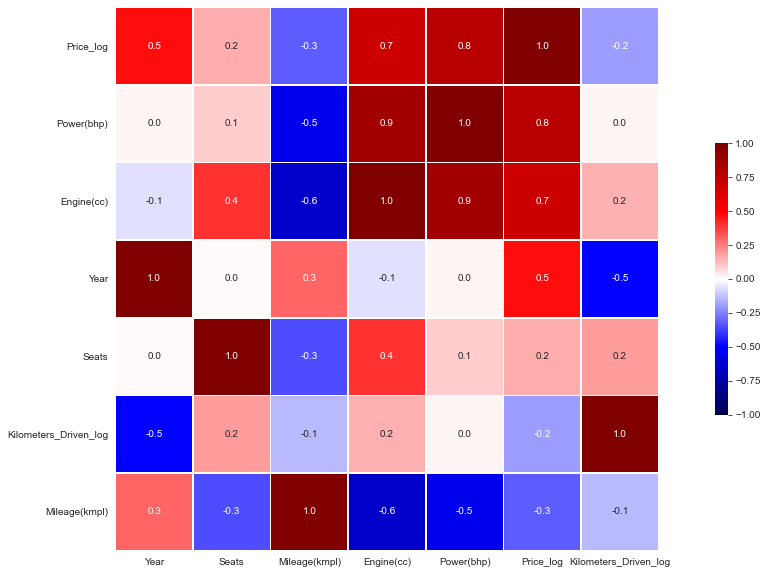

In [800]:
# Create a heatmap of the numerical values to check the correlations
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

corr = (
    df[numeric_columns].corr().sort_values(by=["Price_log"], ascending=False)
)  

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)
plt.show()


**Observations**

* *Price* is positively correlated with *Engine Size* and *Power*, which means that an increase in Engine displacement and Power(bhp) is related to a increase in price.

* *Price* seems to be positively correlated with *Year of the car model*, which means that the newer the cars tends to relate to higher price.

* *Engine* and *Power* seems to have a high correlation.

* *Price* seems to be slightly negatively correlated with Mileage, which seems a little unintuitive. But this can make sense because bigger cars(SUV) tend to be priced higher but have lower mileage, whereas smallers cars (hatchback/sedan) tends to be priced lower but have higher mileage.

* Also, *Price* seems to have a negative correlation with Kilometers_Driven, implying that the higher the miles used on the car, the lower is the price.


### Let's look at the graphs of a few variables that are highly correlated with *Price*.


***Price* vs *Engine(cc)* vs *Transmission***

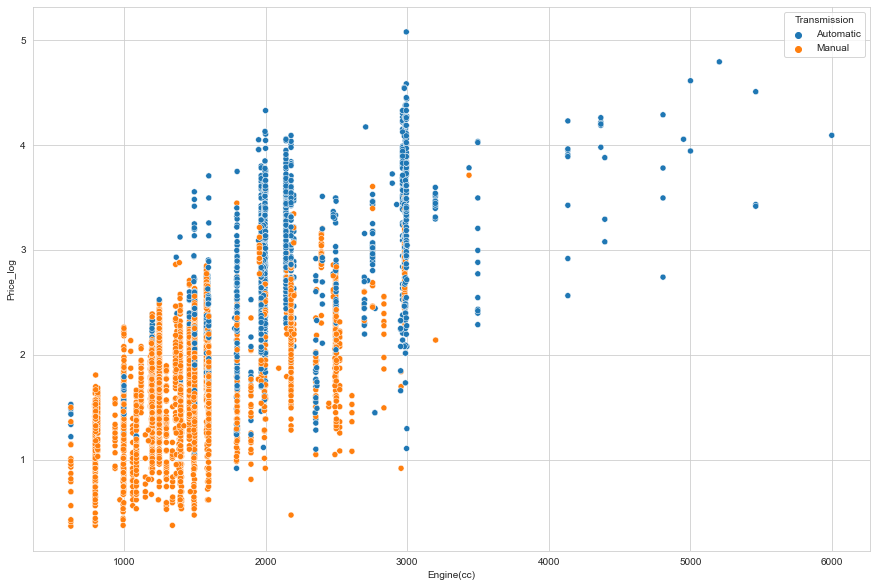

In [863]:
plt.figure(figsize=(15, 10))
sns.scatterplot(y="Price_log", x="Engine(cc)", hue="Transmission", data=df)
plt.show()

* Manual cars on an average tend to have lower price point and lower engine(cc) than automatic cars.

* The variance of manual cars tends to be slightly lower than that of automatic cars.

* Engine follows a linear relationship with a fairly strong correlation with price. Therefore this parameter has to be in the model, provided this is not correlated with another independent variable

***Price* vs *Power(bhp)* vs *Transmission***

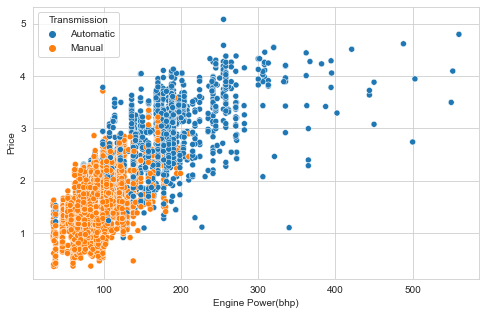

In [871]:
plt.figure(figsize=(8, 5))
sns.scatterplot(y="Price_log", x="Power(bhp)", hue="Transmission", data=df)
plt.xlabel("Engine Power(bhp)")
plt.ylabel("Price")
plt.show()

* Manual cars tend to have lower power(bhp) than automatic cars
* Manual cars also tends to have lower price than automatic cars
* The variance of manual cars tends to be slightly lower than that of automatic cars. 
* Power follows a linear relationship with a fairly strong correlation with price. Therefore this parameter has to be in the model, provided this is not correlated with another independent variable.

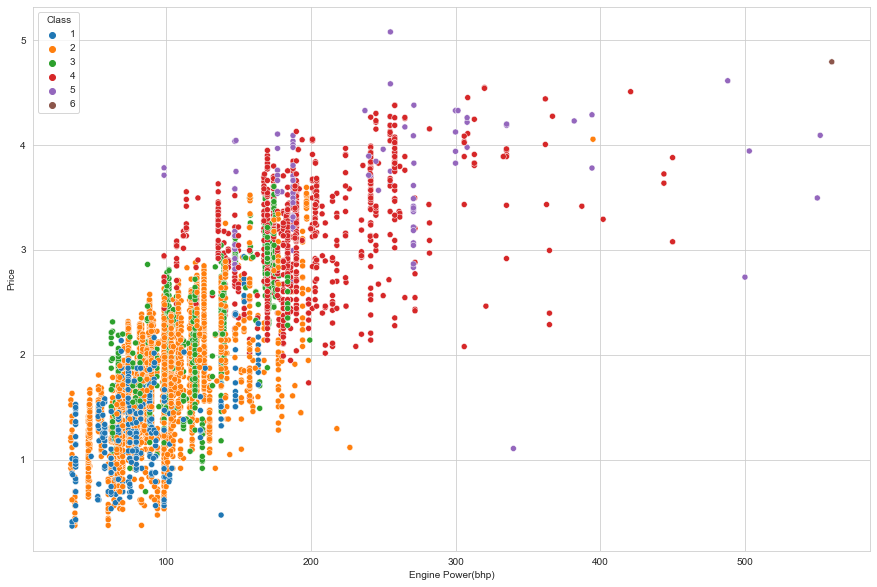

In [865]:
# Plot the scatterplot of price vs power vs Class of car

plt.figure(figsize=(15, 10))
sns.scatterplot(y="Price_log", x="Power(bhp)", hue="Class", data=df)
plt.xlabel("Engine Power(bhp)")
plt.ylabel("Price")
plt.show()

On an average, the higher the class of the car (Class 6 being a highest and Class 1 being the lowest), the higher is the power(bhp) and price <br>
<br>


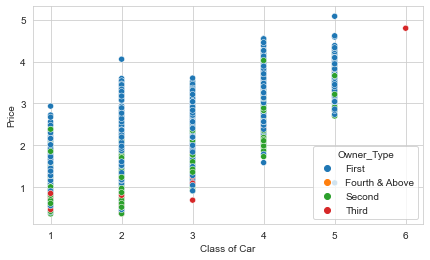

In [870]:

plt.figure(figsize=(7,4))
sns.scatterplot(data=df,x='Class',y='Price_log',hue='Owner_Type')
plt.xlabel("Class of Car")
plt.ylabel("Price")
plt.show()

**Observations:**

* Historical ownership count of the car is dependent on the price, within the cars of same class, with first hand cars priced higher than others <br>
* As you move from Class 1 (lower class cars) to Class 6 (higher class cars), the average price of the cars tends to increase. Since, Class has correlation with price, we want to include `Class` in our model


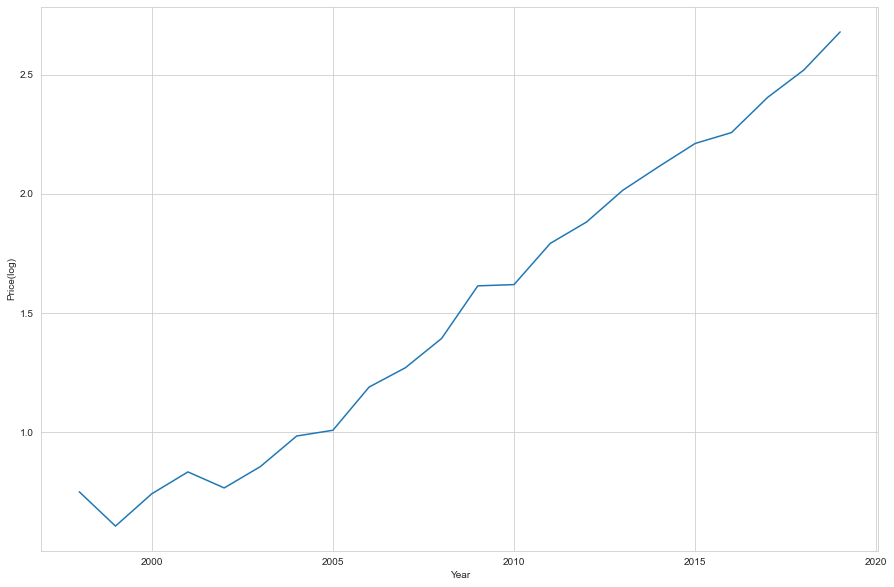

In [867]:
# Price of the cars based on the model year
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="Price_log", data=df, ci=None)
plt.xlabel("Year")
plt.ylabel("Price(log)")
plt.show()

Price seems to have a positive correlation with the model year of the car, implying that the newer cars links to higher price, which makes sense. Since price has a correlation with the Year, the Year variable needs to be present in our model

### Let's look at outliers in every numerical column

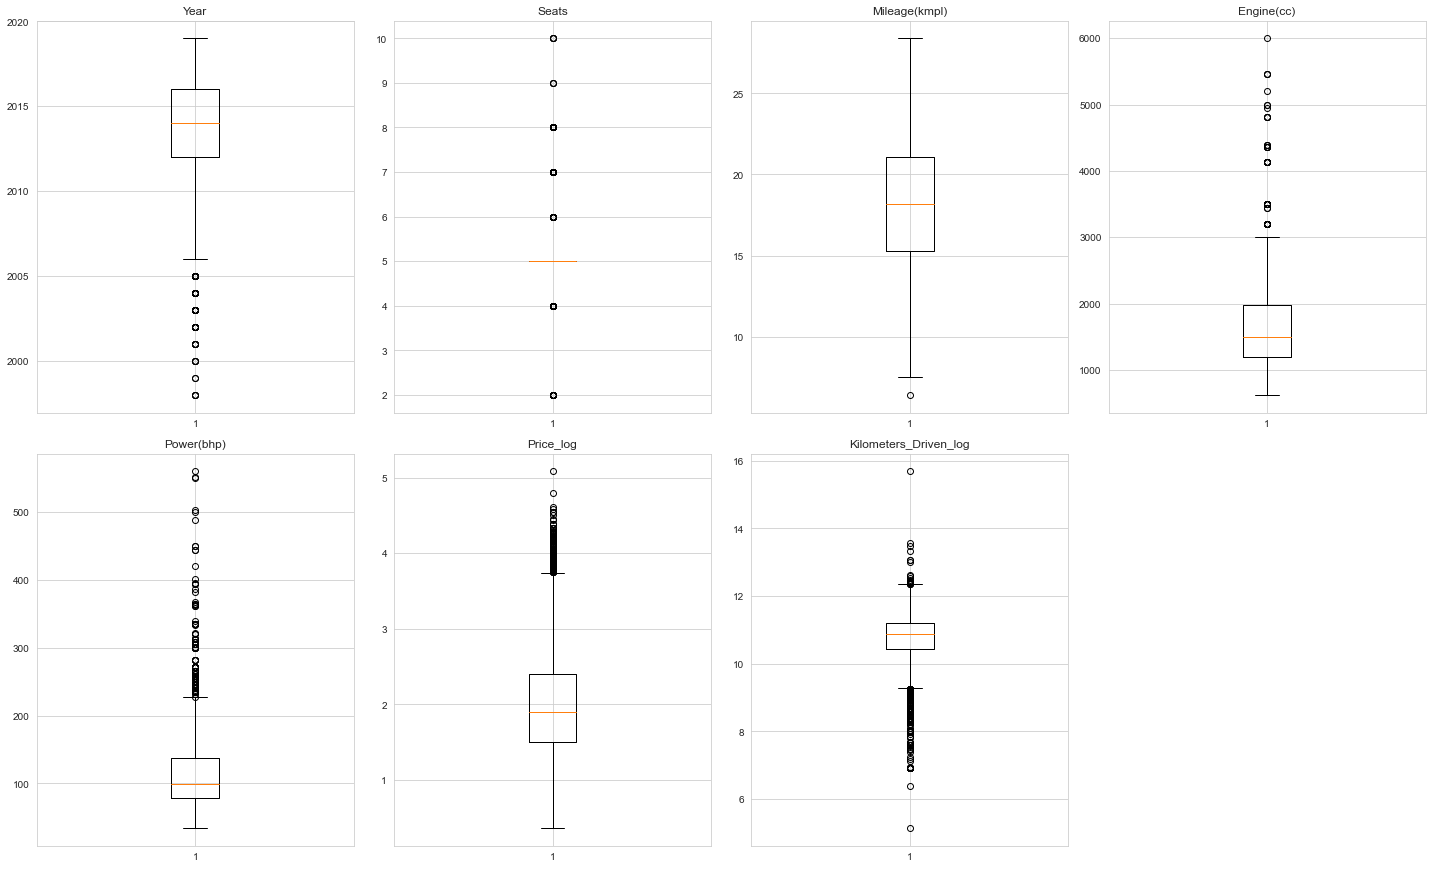

In [706]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Price, Kilometers_Driven, Power(bhp) has a lot of outliers

* Price, Power(bhp), and Kilometers_Driven has a lot of outliers, probably based on 1.5 IQR (standard definition of outlier used by box plot).
* Mileage(kmpl) does not have outliers except one data point
* Engine(cc) has few outliers

### Outliers Handling:

We will not go ahead and delete the outliers for Price and Kilometers_Driven. Kilometers_Driven could vary widely depending on various factors. For instance, a car from metropolitan city where predominant mode of commute is by public transport, might clock fewer kilometers_driven on the car. Whereas cars used by people whose predominant mode of commute is by personal vehicle and travel large distance could see large miles clocked on the car. And the price also could vary dramatically for these cars. Therefore, we believe that these outliers are neccessary information for our model and as a result we will keep the outliers as is

# <a id='link3'>Data Preparation for Modeling</a>

In [707]:
# defining X and y variables
# Drop the dependent variable (Price) and the Brand name since we have 
# condensed the Car Brand name into Class column.

X = df.drop(["Price_log", "Brand"], axis=1)
y = df[["Price_log"]]

print(X.head())
print(y.head())

    Location  Year Fuel_Type Transmission Owner_Type  Seats Class  \
1    Chennai  2012    Diesel       Manual      First    7.0     2   
2      Kochi  2018    Petrol       Manual      First    5.0     2   
3     Jaipur  2015    Diesel       Manual      First    5.0     2   
4     Jaipur  2017    Diesel       Manual      First    5.0     2   
5  Bangalore  2015    Diesel       Manual     Second    5.0     2   

   Mileage(kmpl)  Engine(cc)  Power(bhp)  Kilometers_Driven_log  
1          20.77      1248.0       88.76              11.373675  
2          21.56      1462.0      103.25              10.153974  
3          25.20      1248.0       74.00              11.073257  
4          28.40      1248.0       74.00              10.126671  
5          23.65      1248.0       88.50              10.922209  
   Price_log
1   1.945910
2   2.393339
3   1.887070
4   1.944481
5   2.224624


In [708]:
print(X.shape)
print(y.shape)

(5882, 11)
(5882, 1)


### Categorical Variable Encoding

In [709]:
# # creating dummy variables
X = pd.get_dummies(X, columns=["Location", "Fuel_Type" , "Transmission" , "Owner_Type" , "Class"], drop_first=True)
X.head()

,Year,Seats,Mileage(kmpl),Engine(cc),Power(bhp),Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Class_2,Class_3,Class_4,Class_5,Class_6
1,2012,7.0,20.77,1248.0,88.76,11.373675,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2018,5.0,21.56,1462.0,103.25,10.153974,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
3,2015,5.0,25.20,1248.0,74.00,11.073257,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2017,5.0,28.40,1248.0,74.00,10.126671,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,2015,5.0,23.65,1248.0,88.50,10.922209,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0


In [710]:
X.shape

(5882, 26)

There are a total of 26 columns in X variable , after one-hot encoding , which is a resonable count

In [711]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [712]:
X_train.head()

,Year,Seats,Mileage(kmpl),Engine(cc),Power(bhp),Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Class_2,Class_3,Class_4,Class_5,Class_6
3688,2013,5.0,14.16,1968.0,174.30,11.170449,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6949,2016,5.0,21.66,1498.0,103.52,10.908174,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
376,2016,5.0,28.09,1248.0,88.50,11.097425,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5319,2014,5.0,19.27,2143.0,170.00,10.713662,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6003,2013,7.0,11.18,2696.0,184.00,11.184435,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


# <a id='link5'>Linear Regression using statsmodels</a>

In [713]:
# Let's build linear regression model using statsmodel

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1787.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:45:26   Log-Likelihood:                 627.21
No. Observations:                4117   AIC:                            -1200.
Df Residuals:                    4090   BIC:                            -1030.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Analysis of Co-efficients**

- Engine and Power have a positive correlation with price, implying that increase in these attribute values relates to increase in **Price**. This makes intuitive sense and in line with our expectation. These attributes also have significant p-values.

- Log value of **Kilometers_Driven** has a negative correlation with **Price**, suggesting that the Price increases is related to decrease in the Kilometers_Driven. These attributes also have significant p-values.

- **Fuel_Type_Petrol** has a negative correlation, implying that petrol based cards tends is linked to lower price of the car compared to diesel based cars. This is as per our expectation given that diesel based cars tends to be more pricier than petrol based cars. The p-value is significant for this variable

- Coefficient for **Year** and **Seats** are positive suggesting that new year model cars and cars with more seats tends to relate to higher price. The p-value for **Year** is significant. However, the p-value for **Seats** is insignificant. This could be due to the fact that some priciest high-end cars, tends to have fewer seats (i.e Lamborgini has 2 seats).

- Coefficient for **Mileage(kmpl)** is negative implying that an increase in Mileage of the car corresponds with decrease in price. This can make sense since bigger cars tends to have lower mileage and more pricier than smaller ones.

- **Owner_Type_Second** has negative correlation with significant p-value, implying that second owned cars tends to relate to lower price compared to first owned cars, which is inline with our expectation. The p-value for this is also significant.


# <a id='link6'>Checking Linear Regression Assumptions</a>

Lets check the following Linear Regression assumptions:

**1. No Multicollinearity**

**2. Mean of residuals should be 0**

**3. No Heteroscedasticity**

**4. Linearity of variables**

**5. Normality of error terms**

### TEST FOR MULTICOLLINEARITY



In [714]:
# Check the Variation Inflation Factor scores to check the correlations of variables


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                        833475.600601
Year                              2.110843
Seats                             2.226972
Mileage(kmpl)                     3.411633
Engine(cc)                        9.711721
Power(bhp)                        8.261750
Kilometers_Driven_log             1.729468
Location_Bangalore                2.482912
Location_Chennai                  2.997260
Location_Coimbatore               3.572669
Location_Delhi                    3.193075
Location_Hyderabad                3.815994
Location_Jaipur                   2.694852
Location_Kochi                    3.611216
Location_Kolkata                  3.187040
Location_Mumbai                   4.014485
Location_Pune                     3.411903
Fuel_Type_Petrol                  2.481507
Transmission_Manual               2.160789
Owner_Type_Fourth & Above         1.010648
Owner_Type_Second                 1.171886
Owner_Type_Third                  1.113099
Class_2                           4.3155

## Observations:
* **Engine(cc)** and **Power(bhp)** have a VIF score of much greater than 5. They are both correlated with some variables. But looking at our earliler heatmap, we know that Engine and Power are correlated with each other.<br>

* We will drop the **Engine(cc)** since this one has a higher VIF than **Power(bhp)**


### Visualization : Power(bhp) Vs Engine(cc)

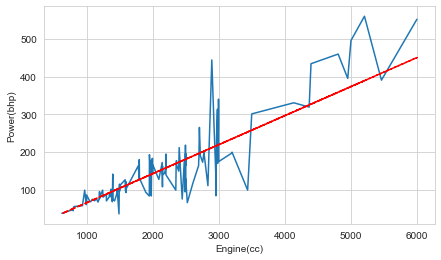

In [820]:
# Plot Power Vs Engine
plt.figure(figsize=(7, 4))

x_data=df["Engine(cc)"]
y_data=df["Power(bhp)"]

sns.lineplot(y=y_data, x=x_data, data=df, ci=None)
plt.xlabel("Engine(cc)")
plt.ylabel("Power(bhp)")

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,p(x_data),"r--")
plt.show()

### Removing Multicollinearity

In [715]:
# we drop the `Engine(cc)` and check the adjusted R-squared

X_train2 = X_train1.drop("Engine(cc)", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                        831420.508452
Year                              2.094802
Seats                             2.105349
Mileage(kmpl)                     2.907919
Power(bhp)                        3.480599
Kilometers_Driven_log             1.762317
Location_Bangalore                2.419718
Location_Chennai                  2.962123
Location_Coimbatore               3.400733
Location_Delhi                    3.059032
Location_Hyderabad                3.731993
Location_Jaipur                   2.652583
Location_Kochi                    3.456496
Location_Kolkata                  3.173224
Location_Mumbai                   3.906639
Location_Pune                     3.268826
Fuel_Type_Petrol                  2.038247
Transmission_Manual               2.151528
Owner_Type_Fourth & Above         1.010861
Owner_Type_Second                 1.171608
Owner_Type_Third                  1.108826
Class_2                           4.236146
Class_3                           3.4961

Removing **Engine(cc)** has brought down the VIF of Power(bhp) from 8.2 to 3.4 .It appears now that features are not correlated.<br>
<br>

In [716]:
# Build the OLS model with the above training data

olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1811.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:45:44   Log-Likelihood:                 577.44
No. Observations:                4117   AIC:                            -1103.
Df Residuals:                    4091   BIC:                            -938.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

* Compared to the earlier regression model (`olsmod0`) , the **Adj. R-Square** for `olsmod1`, after removing the correlated variable **Engine(cc)**, has reduced slightly from 91.9 to 91.7. This is a very immaterial difference.

* Would we get better results if we dropped **Power(bhp)** instead of **Engine(cc)**? 

In [717]:
# Build a new model by dropping Power(bhp)

X_train3 = X_train1.drop("Power(bhp)", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                        824028.051739
Year                              2.073528
Seats                             2.110156
Mileage(kmpl)                     3.427770
Engine(cc)                        4.130233
Kilometers_Driven_log             1.762383
Location_Bangalore                2.419264
Location_Chennai                  2.961865
Location_Coimbatore               3.400860
Location_Delhi                    3.059086
Location_Hyderabad                3.729325
Location_Jaipur                   2.650943
Location_Kochi                    3.456261
Location_Kolkata                  3.173221
Location_Mumbai                   3.906250
Location_Pune                     3.266997
Fuel_Type_Petrol                  2.441882
Transmission_Manual               2.103184
Owner_Type_Fourth & Above         1.010981
Owner_Type_Second                 1.171269
Owner_Type_Third                  1.108876
Class_2                           4.233415
Class_3                           3.6326

The VIF's seemed to increase slightly by dropping **Power(bhp)** compared to VIF's with **Engine(cc)** dropped(training set 2).

In [718]:
# Build the OLS model with new training data X_train3, which has Engine(cc) instead od Power(bhp)

olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1603.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:45:51   Log-Likelihood:                 348.49
No. Observations:                4117   AIC:                            -645.0
Df Residuals:                    4091   BIC:                            -480.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<br>

**Observations:**
* Adj. R-Square for **olsmod2** decreased to 90.7 compared to **olsmod1**, which had an Adj. R-square of 91.7
* Also the **Seats** variable for **olsmod2** changed to negative compared to **olsmod1** which has a positive coeffcient, which is more inline with our general understanding.

**Conclusion:** 
* We will take **olsmod1** to be a better model over **oldmod2**.
<br>

**P-value Analysis :**<br>
Now the above model has no multicollinearity, so we can look at p-values of predictor variables to check their significance.

Looking at the p-values (for `olsmod1`), below are the attributes (listed from highest to lowest) that are insignificant
* Location_Chennai
* Owner_Type_Fourth & Above
* Owner_Type_Third
* Location_Jaipur

We will delete each one at a time and reevaluate the p-values, prior to moving on to the next variable

In [719]:
# Drop the location_Chennai variable from X_train2 dataset ( since this dataset is used to 
# create oldmod1, which we established was a better model than olsmod2)

X_train4 = X_train2.drop(["Location_Chennai"], axis=1)

In [720]:
# Build the OLS regression model

olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1887.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:45:58   Log-Likelihood:                 577.44
No. Observations:                4117   AIC:                            -1105.
Df Residuals:                    4092   BIC:                            -946.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

The variable `Owner_Type_Fourth & Above` and `Owner_Type_Third` is still insignificant. So we will drop `Owner_Type_Fourth & Above` first and rerun the model

In [721]:
# Drop "Owner_Type_Fourth & Above" from earliler training dataset
X_train5 = X_train4.drop(["Owner_Type_Fourth & Above"], axis=1)

In [722]:
# Build regression model
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1969.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:46:03   Log-Likelihood:                 576.85
No. Observations:                4117   AIC:                            -1106.
Df Residuals:                    4093   BIC:                            -954.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -191.91

The p-value for `Owner_Type_Third` is still insignificant. We will take that out

In [723]:
X_train6 = X_train5.drop(["Owner_Type_Third"], axis=1)

In [724]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2058.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:46:09   Log-Likelihood:                 576.04
No. Observations:                4117   AIC:                            -1106.
Df Residuals:                    4094   BIC:                            -960.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -192.63

None of the attribites have p-value that is significant at a 0.05 significance level. <br>

**We will consider X_train6 as final set and olsres5 as our final model.**<br>

**Observations**

* Now adjusted R-squared is 0.917, i.e., our model is able to explain 91.7% of variance. This shows that the model is good fit.
* The adjusted R-squared in **olsres0** (where we considered all the variables) was 0.919. This shows that the variables we dropped were not affecting the model much.

### Now we'll check the rest of the assumptions on model *olsres5*

2. Mean of residuals should be 0 
3. Linearity of variables
4. Normality of error terms
5. No Heteroscedasticity

#### Assumption 2 : Mean of residuals

In [725]:
# Estimate the mean of residuals

residual = olsres5.resid
np.mean(residual)

6.261641678807798e-14

Mean of residuals is almost 0. Therefore Assumption 2 is satisfied

#### Assumption 3 : Linearity

In [726]:
# Get the residual and fitted values from our final model olsmod5

residual = olsres5.resid
fitted = olsres5.fittedvalues  # predicted values

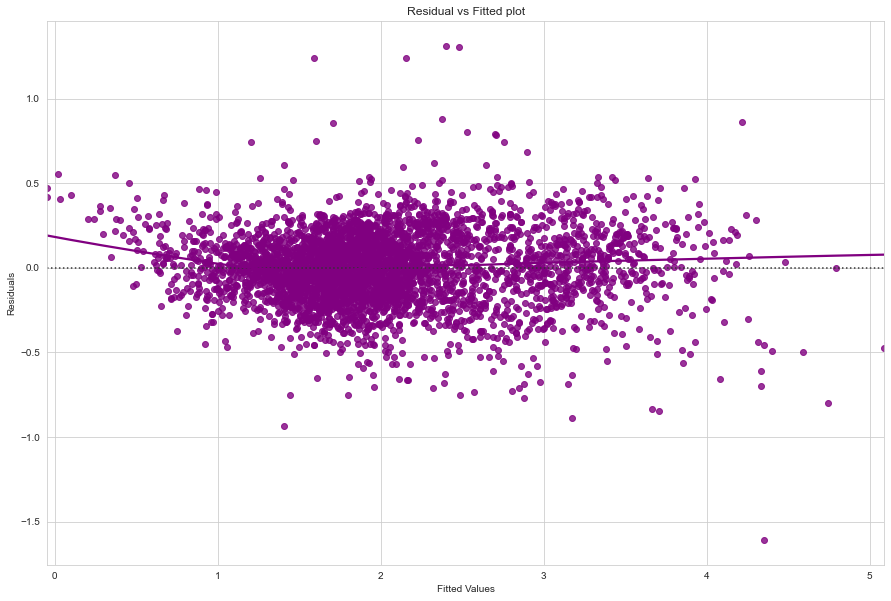

In [727]:
# Plot the residual vs fitted plot

sns.set_style("whitegrid")
plt.figure(figsize=(15,10)) # set the figure size
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

The residual plot shows a slight uneven distibution between 0-1 value of x-axis (fitted values). However, this pattern does not have a trend i.e the regression line of the residuals follows a fairly straight line across the rest of the graph. The rest of the graph follows a fairly evenly distibuted points, thereby satisfying the linearity assumption

#### Assumption 4: Test for Normality

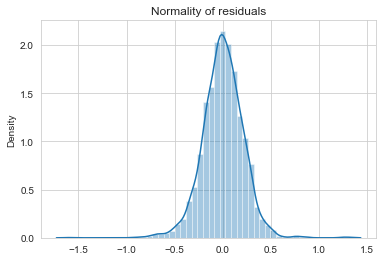

In [729]:
# Plot the residuals as a density curve
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

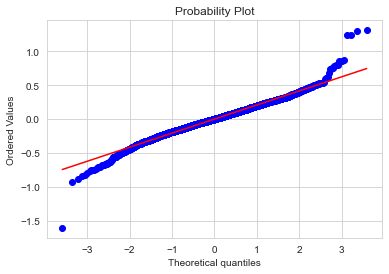

In [730]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

The normal probability plot of residuals approximately follows a straight line, therefore satisfying the normality test assumption 

In [731]:
# Shapiro Test
stats.shapiro(residual)

ShapiroResult(statistic=0.9789103269577026, pvalue=2.8427231836211074e-24)

#### Observations:
* As per the Shapiro test, the pvalue is < 0.05 thereby implying that the residuals are not normal .But as per QQ plot (above) they are approximately normal.
* We will go with the QQ plot and conclude that the residuals are normal, since Shapiro test shows the data as not normal , even for small deviations, whenever the dataset is big.

Assumption 4 (Test for Normality) has been satisfied

#### Assumption 5 : Test for Homoskedasticity

In [732]:
# Conduct the Goldfeldquandt test to check for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train6)
lzip(name, test)

[('F statistic', 1.0398352991737947), ('p-value', 0.18911556142093572)]

**Since p-value (0.189) > 0.05, we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.**

### Assumption Test Result :
As tested above, all the assumptions for Linear Regression are satisfied

### Predicting on the test data


In [733]:
X_train6.columns

Index(['const', 'Year', 'Seats', 'Mileage(kmpl)', 'Power(bhp)',
       'Kilometers_Driven_log', 'Location_Bangalore', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second', 'Class_2', 'Class_3', 'Class_4', 'Class_5',
       'Class_6'],
      dtype='object')

In [734]:
# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train6.columns]

In [735]:
X_test_final.head()

,const,Year,Seats,Mileage(kmpl),Power(bhp),Kilometers_Driven_log,Location_Bangalore,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Class_2,Class_3,Class_4,Class_5,Class_6
6585,1.0,2014,5.0,22.70,89.84,10.732061,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
6513,1.0,2013,5.0,17.80,67.00,11.719948,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
206,1.0,2014,5.0,26.59,74.00,11.134049,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4045,1.0,2019,8.0,13.68,147.80,9.327412,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4284,1.0,2015,7.0,13.00,168.50,11.502885,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [736]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(olsres5, X_train6.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.159277,8.884288,0.210376,0.917069


In [737]:
# Checking model performance on test set (seen 70% data)
print("Test Performance\n")
model_perf(olsres5, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.156532,8.836784,0.2208,0.918239


* Now we can see that the model has low test and train RMSE and MAE, and both the errors are comparable. So, our model is not suffering from overfitting.

* The model is able to explain 91.8% of the variation on the test set, which is very good.

* The MAPE on the test set suggests we can predict within 8.8% of the Price of used cars. 

* MAE indicates that our current model is able to predict log of price within a mean error of 0.156 on the test data

### Conclusion
**we can conclude the model *olsres5* is good for prediction as well as inference purposes.**

### Summary of olsres5 Model :

In [738]:
# let us print the model summary

olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2058.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:52:03   Log-Likelihood:                 576.04
No. Observations:                4117   AIC:                            -1106.
Df Residuals:                    4094   BIC:                            -960.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -192.63

# <a id='link7'>Conclusions</a>


***olsres5* is our final model which follows all the assumptions, and can be used for interpretations.**


1. *Year* has a positive coefficient implying that newer cars are linked with higher price of cars. This also has low std.err and high significance

2. *Seats* has positive coefficient thereby immying that cars with more seats are linked to higher price. This attribute also has high significance.

3. *Mileage(kmpl)* has negative coefficient implying that higher mileage is linked to lower price of the car. Although this goes against our intuition, it still makes sense because bigger cars tend to have lower mileage and higher price. Therefore, with this rationale, it makes sense to have Mileage have a negative correlation with price. This again has a high significance

4. *Power* has a positive coefficient with high significance. A high engine power is linked to higher price.

5. The *kilometers driven* has a negative coefficient with a high significance. This is inline with our expectation. A car with high miles logged should relate to lower price.

6. *Petrol based cars* has negative coefficient compared to diesel engine cars, implying that petrol cars are relates to lower price of the car compared to diesel cars. This is as per our expectation based on real world knowledge.

7. *Manual cars* have negative coefficient compared to automatic cars, implying that manual transmission relates to a lower price compared to automatic cars.

8. As you go up the class from *Class* 1 (basic car model) to Class 6 (high end luxury cars) , the coeffcient is positive and increasing. This tells that as you move to high end cars, the price of the cars has a upward trend compared to low end car.


